In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
data=pd.read_csv("energy efficiency.csv")
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Energy Efficiency
0,0.65,140.2,250.5,300.3,25.5,0.8,0.75
1,0.68,155.6,260.1,320.7,28.3,1.0,0.72
2,0.71,170.2,275.6,340.1,27.9,0.9,0.79
3,0.64,135.3,245.4,290.4,24.7,0.7,0.70
4,0.67,150.8,255.5,310.2,26.0,1.0,0.74


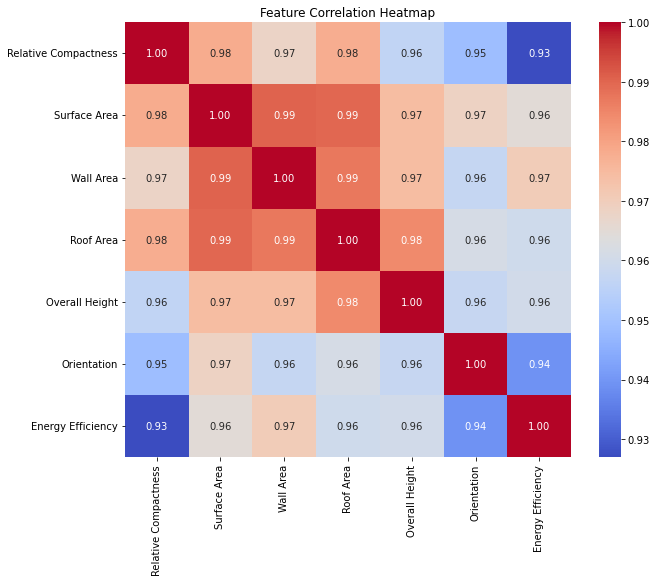

In [2]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Energy Efficiency'],
      dtype='object')

 Model Performace:
Mean Squared Error (MSE):0.00
R-Squared(r2 score):0.88


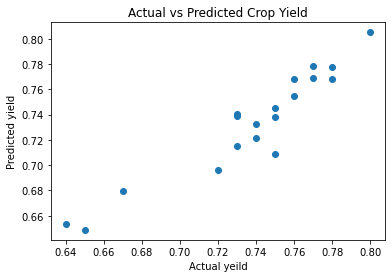

Model Accuracy(r2 as%):88.29%


In [4]:
print(data.columns)
X=data[['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation']]
y=data[['Energy Efficiency']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("\n Model Performace:")
print(f"Mean Squared Error (MSE):{mse:.2f}")
print(f"R-Squared(r2 score):{r2:.2f}")
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yeild')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Crop Yield')
plt.show()
accuracy=r2*100
print(f"Model Accuracy(r2 as%):{accuracy:.2f}%")

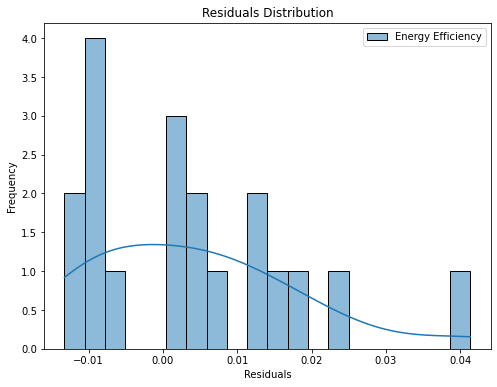

In [5]:
residuals=y_test-y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals,kde=True,color="red",bins=20)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [10]:
sample_data = np.array([0.67,150.8,255.5,310.2,26.0,1.0]).reshape(1, -1)

# Predict the house price using the trained model
predicted_price = model.predict(sample_data)

# Print the predicted price for the sample data
print(f"\nPredicted Price for sample data: ${predicted_price[0][0]:.2f}")



Predicted Price for sample data: $0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
